#Mountain Car MDP
This notebook shows how to generate the state-action value function for the classic mountain car problem. The correctness of the solution is verified by trajectory simulations.

###Generate state-action value function

In [1]:
using MDPs, MountainCar
mdp = MDP(state_space(20, 20), action_space(200), transition, reward)
policy = value_iteration(mdp, false, "../data/qmc_small.csv", false)
print("")  # suppress output

Starting value iteration...
Value iteration took 291 iterations and 2.82e+01 sec


###Visualize policy as a heat map

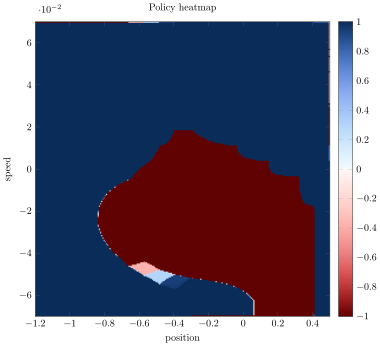

In [4]:
viz_policy(mdp, policy)

###Verify correctness
Simulate and visualize trajectory from initial state `[position, speed]`.

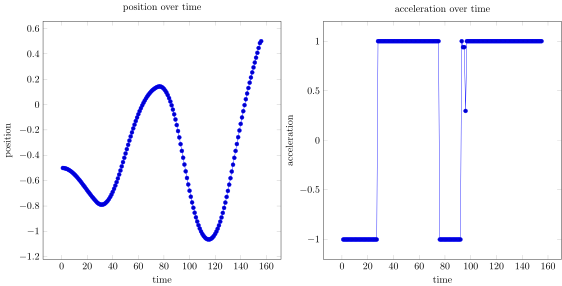

In [5]:
ss, as = simulate(mdp, policy, [-0.5, 0.0])
viz_trajectory(ss, as)